In [7]:
include("NNSFE.jl")

quartic_potential (generic function with 1 method)

In [8]:
psi0 = exp.(-x_grid.^2);  # Initial wave function

psi = psi0 # Time evolution loop
alpha, g, s, V = 2, 0, 0, 0;  # Fractional order, nonlinearity, saturation, and potential

psi_evo = zeros(ComplexF64, N, M) # Initialize wave function evolution array
for t in 1:M
    psi = time_evolution(psi, alpha, dt, k, g, s, V)
    psi_evo[:, t] = psi
end

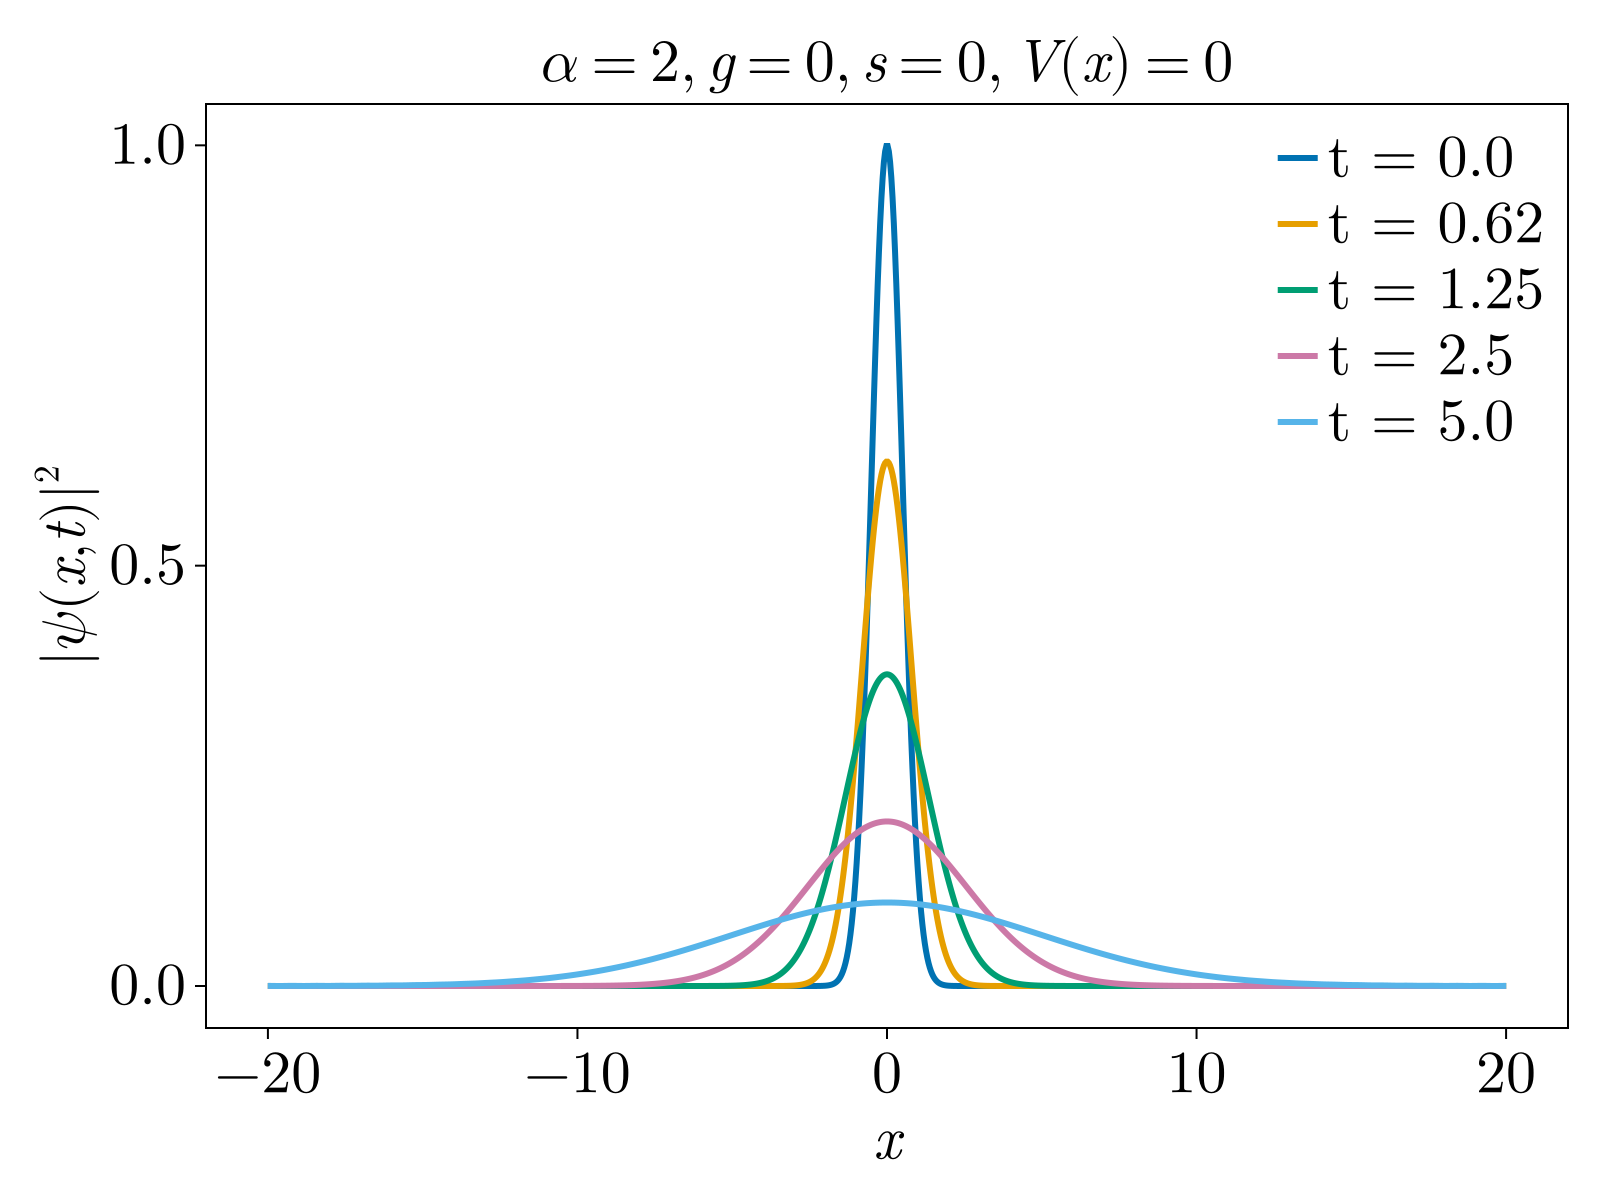

In [10]:
# Calculate |psi|^2
psi_final = real(psi_evo .* conj(psi_evo))

# Select time steps to plot
time_steps_to_plot = [1, Int(M/8), Int(M/4), Int(M/2), M]

# Plot results
# Set global theme
set_theme!(theme_latexfonts(), size = (800, 600))

fig = Figure(fontsize = 30)
ax = Axis(fig[1, 1], xlabel = L"x", ylabel = L"|\psi(x,t)|^2", xgridvisible = false, ygridvisible = false,
title = L"\alpha = 2,\, g = 0,\, s = 0,\, V(x) = 0")
for t in time_steps_to_plot
    lines!(ax, x_grid, psi_final[:, t], label="t = $(round(tfinal * t / M, digits=2))", alpha=1, linewidth=3)
end

axislegend(ax, framevisible = false)
save("./figs/lse_evolution.pdf", fig)
fig  # Display the plot

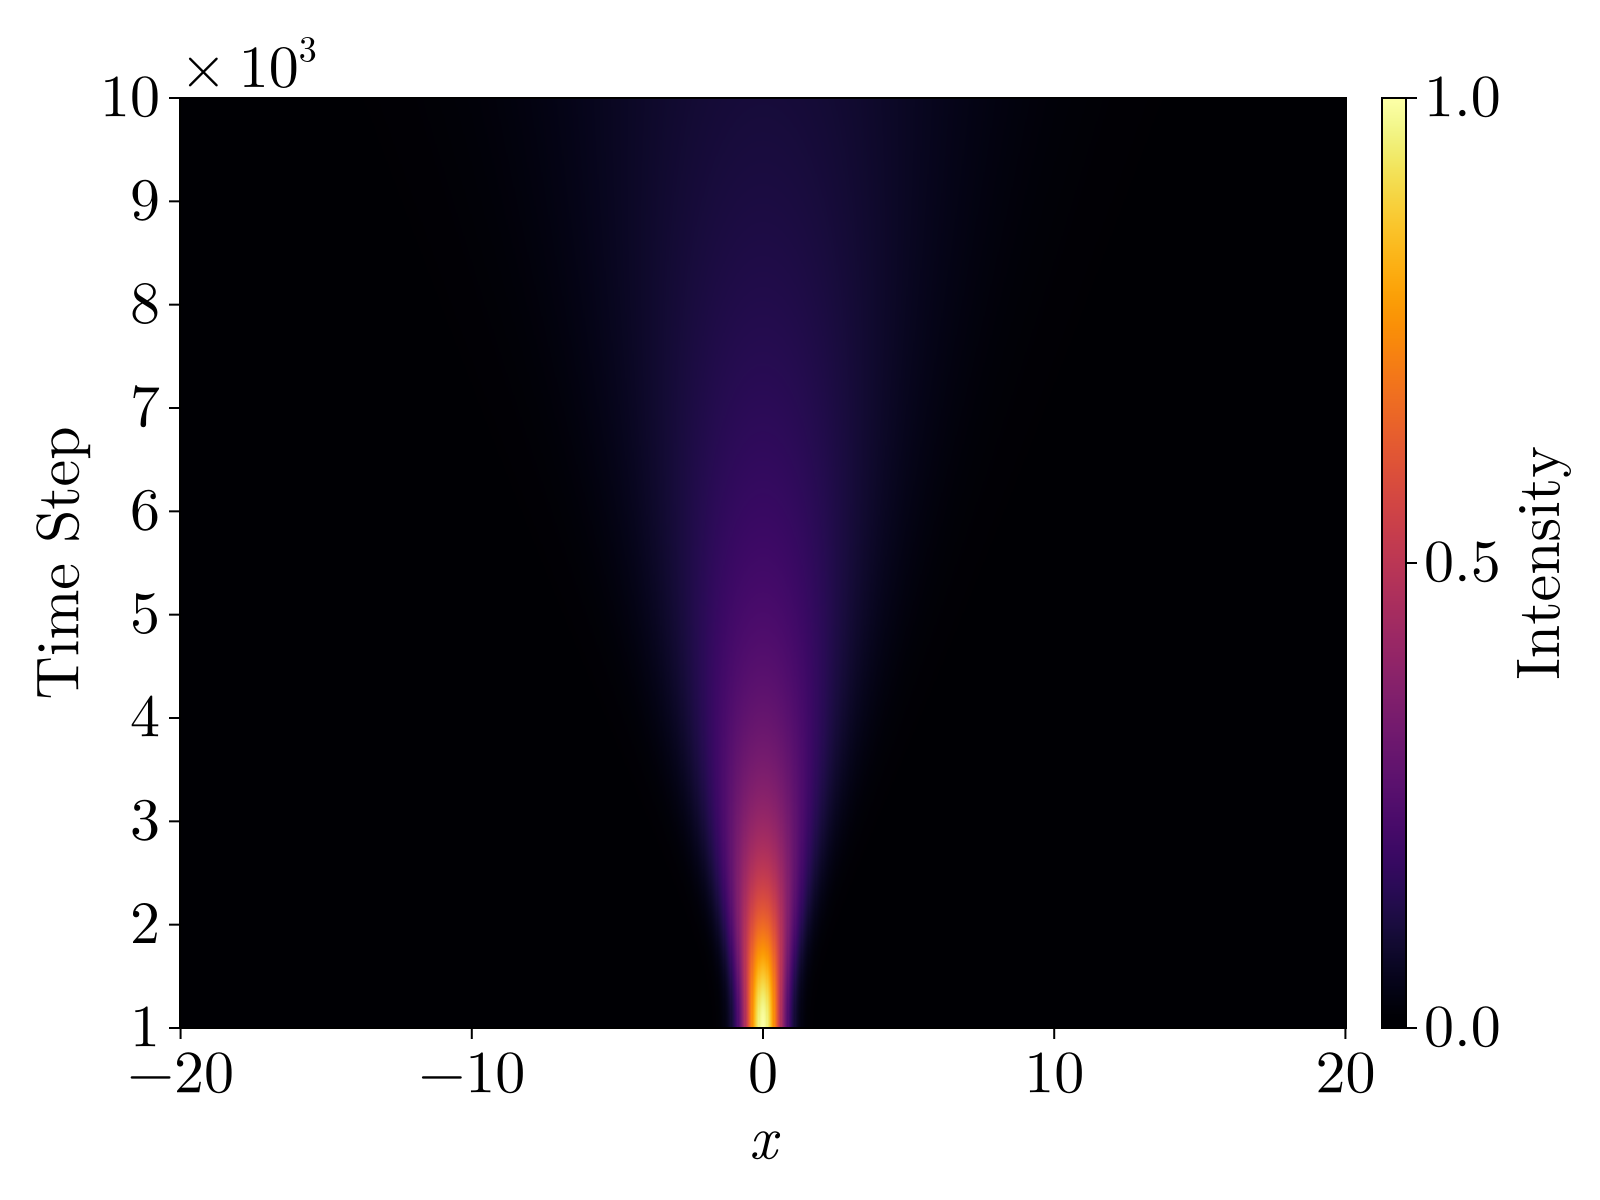

In [11]:
# Plot heatmap of the evolution of |psi|^2 over space and time
fig = Figure(fontsize=30)
ax = Axis(fig[1, 1], xlabel = L"$x$", ylabel = "Time Step")
y_scaled = 1:M/1000
heatmap!(ax, x_grid, y_scaled, psi_final, colormap = :inferno, rasterize = 1)
Label(fig[1, 1, Top()], halign = :left, L"\times 10^{3}")
# Add colorbar
Colorbar(fig[1, 2], colormap = :inferno, label = "Intensity")
save("./figs/lse_heatmap.pdf", fig)
fig  # Display the heatmap plot

### Exact Solution for Initial Gaussian wave packet

\begin{equation}
    \psi(x,t) = \frac{1}{\sqrt{1 + 2it}} \exp\left(- \frac{x^2}{1 + 2it}\right)
\end{equation}

In [12]:
# Exact analytical solution function for a Gaussian wave packet
function exact_solution(x, t)
    return 1 / sqrt(1 + 2im * t) * exp.(-x.^2 / (1 + 2im * t))
end

exact_solution (generic function with 1 method)

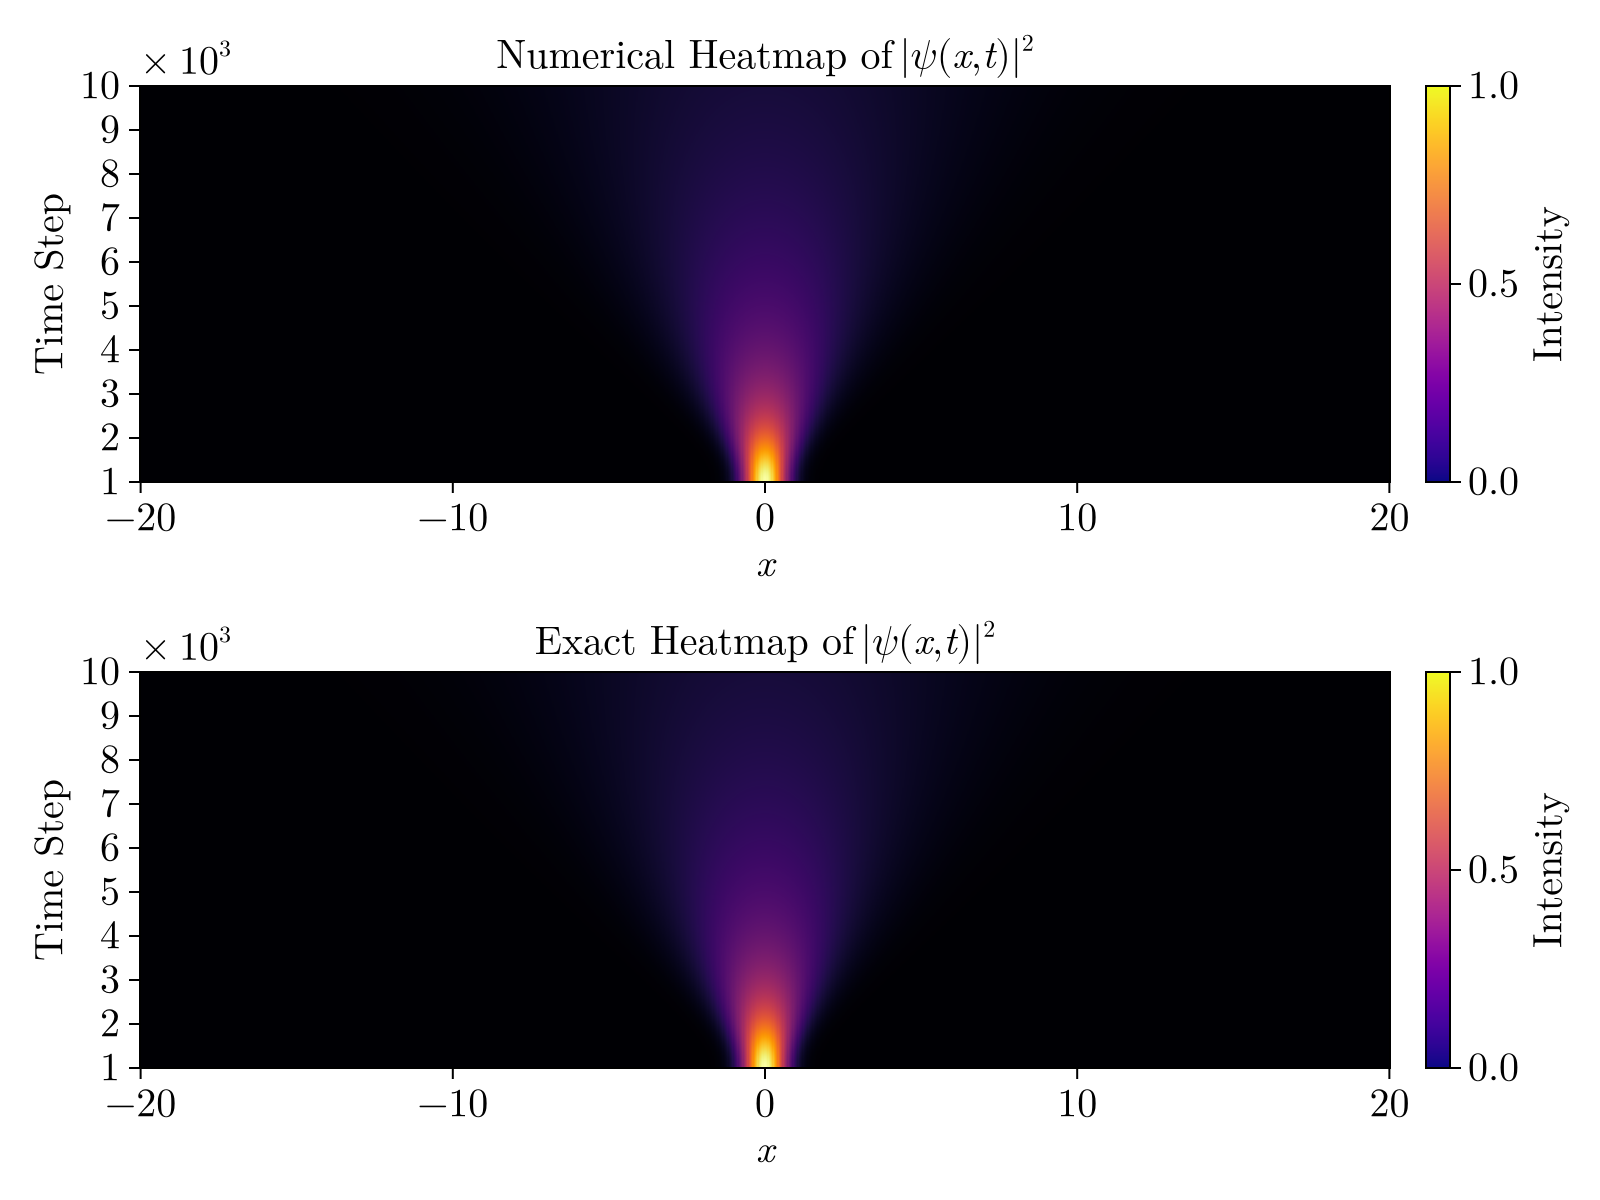

In [13]:
# Calculate exact solution at each time step
psi_exact = zeros(ComplexF64, N, M)
for t in 1:M
    time = t * dt
    psi_exact[:, t] = exact_solution(x_grid, time)
end

# Calculate |psi_exact|^2 for the exact solution
psi_exact_abs = real(psi_exact .* conj(psi_exact))

# Plot heatmap of the numerical and exact solution
fig = Figure(fontsize=20)

# Numerical solution heatmap
ax1 = Axis(fig[1, 1], xlabel = L"x", ylabel = "Time Step", title = L"\text{Numerical Heatmap of}\, |\psi(x,t)|^2")
heatmap!(ax1, x_grid, y_scaled, psi_final, colormap = :inferno, rasterize = 1)
Label(fig[1, 1, Top()], halign = :left, L"\times 10^{3}")
Colorbar(fig[1, 2], colormap = :plasma, label = "Intensity")

# Exact solution heatmap
ax2 = Axis(fig[2, 1], xlabel = L"x", ylabel = "Time Step", title = L"\text{Exact Heatmap of}\, |\psi(x,t)|^2")
heatmap!(ax2, x_grid, y_scaled, psi_exact_abs, colormap = :inferno, rasterize = 1)
Label(fig[2, 1, Top()], halign = :left, L"\times 10^{3}")
Colorbar(fig[2, 2], colormap = :plasma, label = "Intensity")
save("./figs/lse_comparison_heatmap.pdf", fig)
fig  # Display the heatmaps

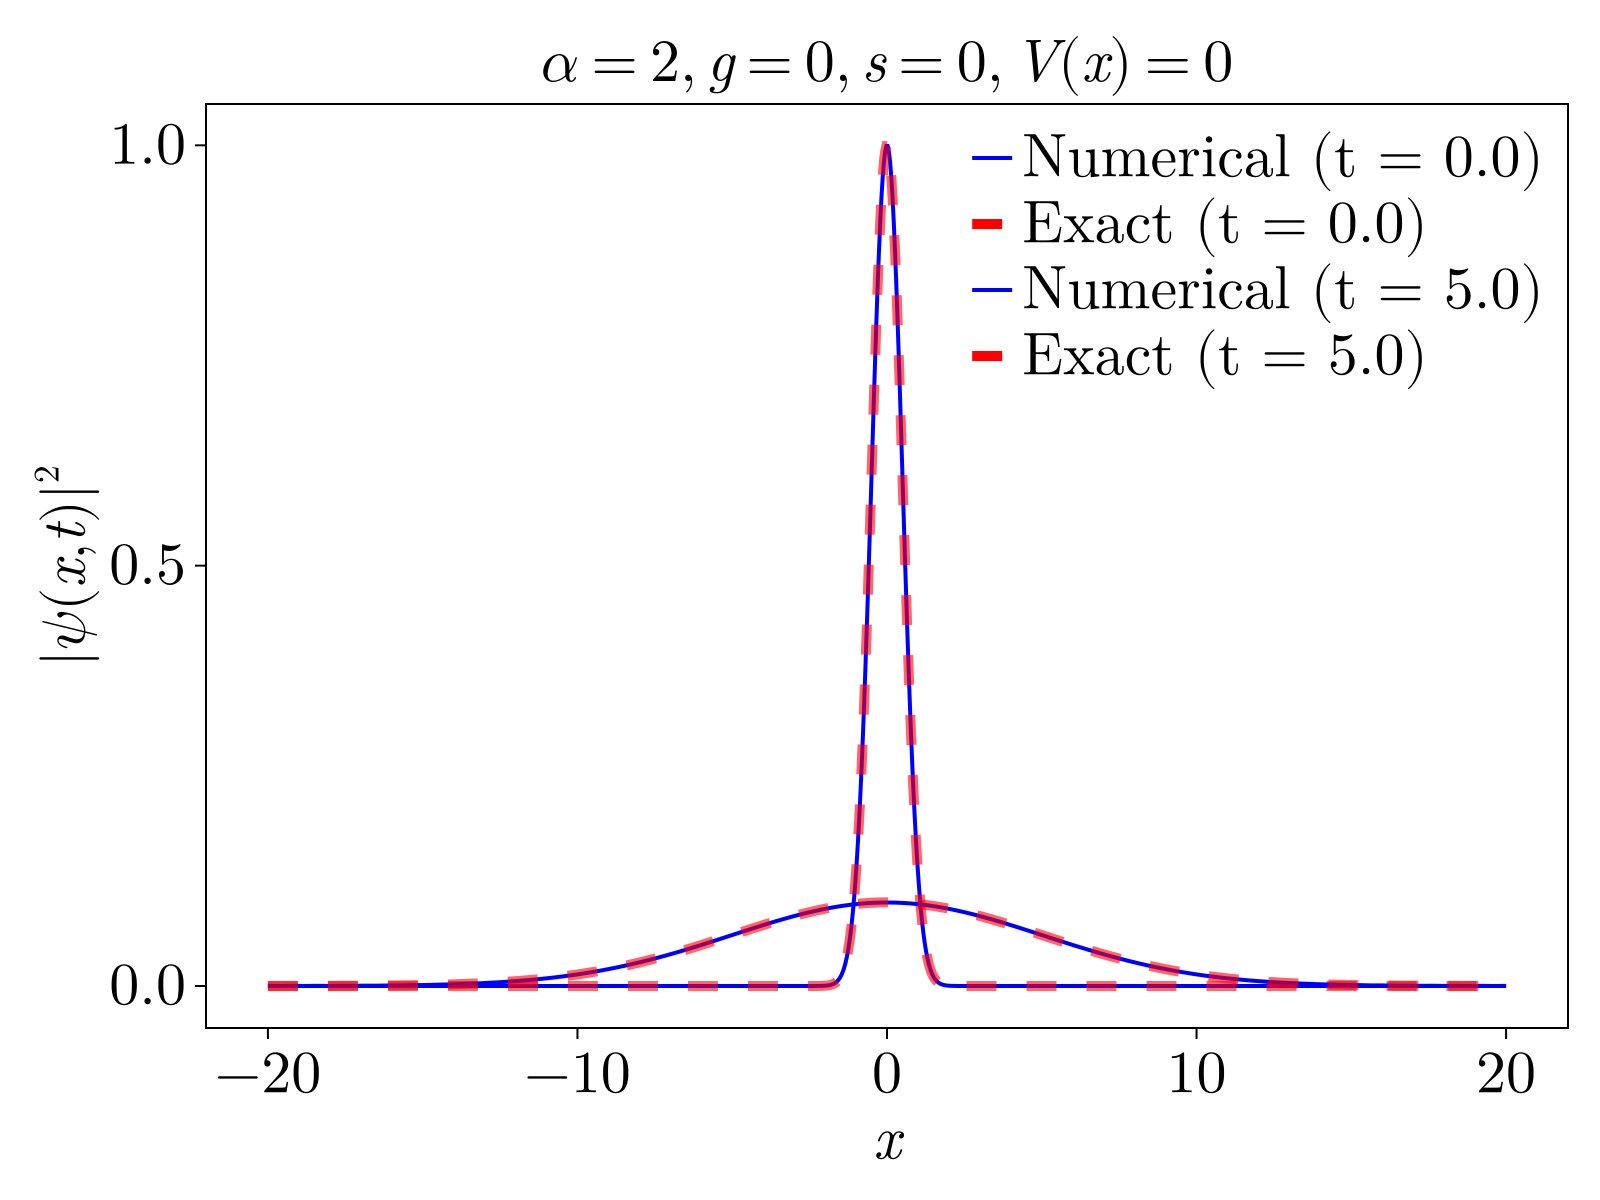

In [14]:
# Select specific time steps for comparison
time_steps_to_plot = [1, M]

# Plot line plots of the numerical and exact solution for selected time steps
fig = Figure(fontsize=30)
ax = Axis(fig[1, 1], xlabel = L"x", ylabel = L"|\psi(x,t)|^2", 
title = L"\alpha = 2,\, g = 0,\, s = 0,\, V(x) = 0", xgridvisible = false, 
ygridvisible = false)

# Plot numerical and exact solutions
for t in time_steps_to_plot
    time_value = round(tfinal * t / M, digits=2)
    
    # Plot numerical solution
    lines!(ax, x_grid, psi_final[:, t], label = "Numerical (t = $time_value)", color = :blue, linewidth=2, alpha=1)
    
    # Plot exact solution
    lines!(ax, x_grid, psi_exact_abs[:, t], label = "Exact (t = $time_value)", color = :red, linewidth=5, linestyle=:dash, alpha=0.6)
end
# Add a legend
axislegend(ax, position=:rt, framevisible=false)
save("./figs/lse_comparison_lineplot.pdf", fig)
fig  # Display the plot